## CHARGEMENT

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("C:\\Users\\olake\\Desktop\\PROJETS_CAS_ENTREPRISE\\PROJET_1\\data\\donnees_brutes\\books.csv")
data.head()

,title,price,rating
0,A Light in the Attic,Â£51.77,3
1,Tipping the Velvet,Â£53.74,1
2,Soumission,Â£50.10,1
3,Sharp Objects,Â£47.82,4
4,Sapiens: A Brief History of Humankind,Â£54.23,5


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   100 non-null    object
 1   price   100 non-null    object
 2   rating  100 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 2.5+ KB


## NETTOYAGE

In [4]:
import re
import unicodedata

def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove accents
    text = ''.join(
        c for c in unicodedata.normalize('NFD', text)
        if unicodedata.category(c) != 'Mn'
    )
    
    # Ensure UTF-8 encoding
    text = text.encode('utf-8', 'ignore').decode('utf-8')

    # Remove special characters and digits
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

In [5]:
data["cleaned_title"] = data["title"].apply(clean_text)

data[["title", "cleaned_title"]].head()

,title,cleaned_title
0,A Light in the Attic,a light in the attic
1,Tipping the Velvet,tipping the velvet
2,Soumission,soumission
3,Sharp Objects,sharp objects
4,Sapiens: A Brief History of Humankind,sapiens a brief history of humankind


In [6]:
data[data["cleaned_title"].str.len()==0]

,title,price,rating,cleaned_title


In [7]:
data[data["cleaned_title"].str.len() > 0]

,title,price,rating,cleaned_title
0,A Light in the Attic,Â£51.77,3,a light in the attic
1,Tipping the Velvet,Â£53.74,1,tipping the velvet
2,Soumission,Â£50.10,1,soumission
3,Sharp Objects,Â£47.82,4,sharp objects
4,Sapiens: A Brief History of Humankind,Â£54.23,5,sapiens a brief history of humankind
...,...,...,...,...
95,Lumberjanes Vol. 3: A Terrible Plan (Lumberjan...,Â£19.92,2,lumberjanes vol a terrible plan lumberjanes
96,"Layered: Baking, Building, and Styling Spectac...",Â£40.11,1,layered baking building and styling spectacula...
97,Judo: Seven Steps to Black Belt (an Introducto...,Â£53.90,2,judo seven steps to black belt an introductory...
98,Join,Â£35.67,5,join


In [8]:
data["cleaned_title"].str.split().str.len().describe()

count    100.000000
mean       7.050000
std        5.133323
min        1.000000
25%        3.000000
50%        6.000000
75%        9.000000
max       26.000000
Name: cleaned_title, dtype: float64

## TRANSFORMATION DU RATING EN VARIABLE EXPLOITABLE

In [9]:
data["cleaned_rating"] = data["rating"].astype(str).str.lower().str.strip()

In [10]:
data[["rating", "cleaned_rating"]].drop_duplicates()

,rating,cleaned_rating
0,3,3
1,1,1
3,4,4
4,5,5
10,2,2


In [11]:
data['numeric_rating'] = pd.to_numeric(data['cleaned_rating'], errors='coerce')
data[['rating', 'numeric_rating']].head()

,rating,numeric_rating
0,3,3
1,1,1
2,1,1
3,4,4
4,5,5


In [12]:
def sentiment_label(rating):
    if rating >= 4:
        return 'positive'
    elif rating == 3:
        return 'neutral'
    else:
        return 'negative'

In [13]:
data["sentiment"] = data['numeric_rating'].apply(sentiment_label)
data[["rating", "numeric_rating", "sentiment"]].head()

,rating,numeric_rating,sentiment
0,3,3,neutral
1,1,1,negative
2,1,1,negative
3,4,4,positive
4,5,5,positive


In [14]:
data["sentiment"].value_counts()

sentiment
negative    41
positive    37
neutral     22
Name: count, dtype: int64

In [ ]:
data.to_csv("C:\\Users\\olake\\Desktop\\PROJETS_CAS_ENTREPRISE\\PROJET_1\\data\\donnees_nettoyees\\books_review_nettoyees.csv", index=False)

## VECTORISATION

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=300, ngram_range=(1,2), stop_words='english')
X = vectorizer.fit_transform(data["cleaned_title"])
X.shape

(100, 300)

In [16]:
y = data["sentiment"]

## SEPARATION ENTRAINEMENT/TEST

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)   

## MODELE

### REGRESSION LOGISTIQUE

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

modele = LogisticRegression()
modele.fit(X_train, y_train)

y_pred = modele.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.31      0.62      0.42         8
     neutral       0.00      0.00      0.00         5
    positive       0.25      0.14      0.18         7

    accuracy                           0.30        20
   macro avg       0.19      0.26      0.20        20
weighted avg       0.21      0.30      0.23        20



c:\Users\olake\Desktop\PROJETS_CAS_ENTREPRISE\PROJET_1\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\olake\Desktop\PROJETS_CAS_ENTREPRISE\PROJET_1\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\olake\Desktop\PROJETS_CAS_ENTREPRISE\PROJET_1\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


## SVM

In [22]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

modele_svc = LinearSVC()
modele_svc.fit(X_train, y_train)

y_pred_svm = modele_svc.predict(X_test)

print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

    negative       0.31      0.62      0.42         8
     neutral       0.00      0.00      0.00         5
    positive       0.33      0.14      0.20         7

    accuracy                           0.30        20
   macro avg       0.22      0.26      0.21        20
weighted avg       0.24      0.30      0.24        20



# ANALYSE THEMATTIQUE

In [23]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

data['cluster'] = clusters
data[['cleaned_title', 'cluster']].head()

,cleaned_title,cluster
0,a light in the attic,1
1,tipping the velvet,1
2,soumission,1
3,sharp objects,1
4,sapiens a brief history of humankind,1


In [24]:
terms = vectorizer.get_feature_names_out()
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

for i in range(3):
    print(f"Cluster {i}:")
    for ind in order_centroids[i, :10]:
        print(f" {terms[ind]}")
    print()

Cluster 0:
 dark
 wood
 dark wood
 dark dark
 workbook anxiety
 workbook
 woodhull
 wonders urban
 wonders
 wonderful lamp

Cluster 1:
 lumberjanes
 black
 world
 guide
 art
 vol
 paris
 poems
 beginners
 story

Cluster 2:
 life
 scott
 woman
 indie
 indie underground
 american indie
 american
 free soul
 higherselfie wake
 higherselfie



In [25]:
!pip install wordcloud

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [33]:
def plot_wordcloud(df, cluster_label):
    text = " ".join(df[df['cluster'] == cluster_label]['cleaned_title'])
    wordcloud = WordCloud(width=800, height=400, stopwords=ENGLISH_STOP_WORDS, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud pour le Cluster {cluster_label}')
    plt.show()

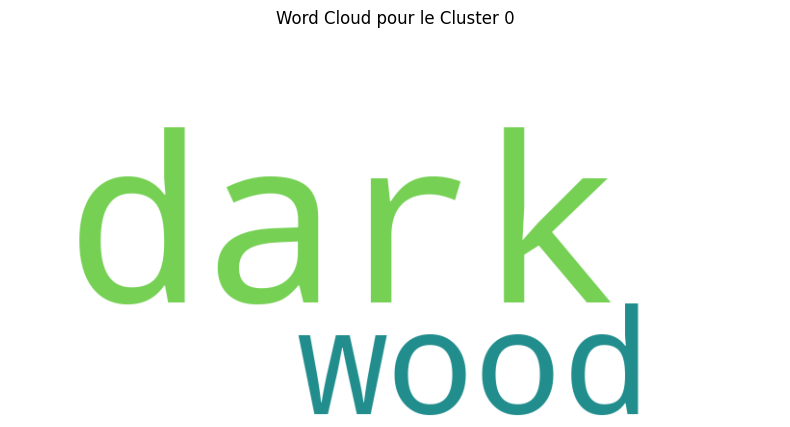

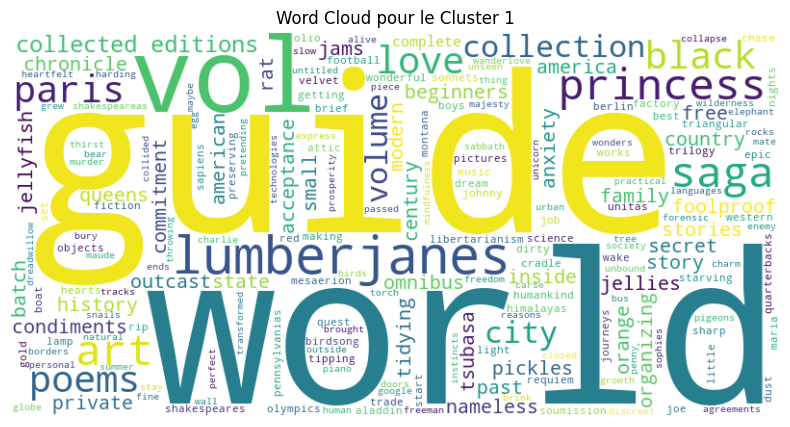

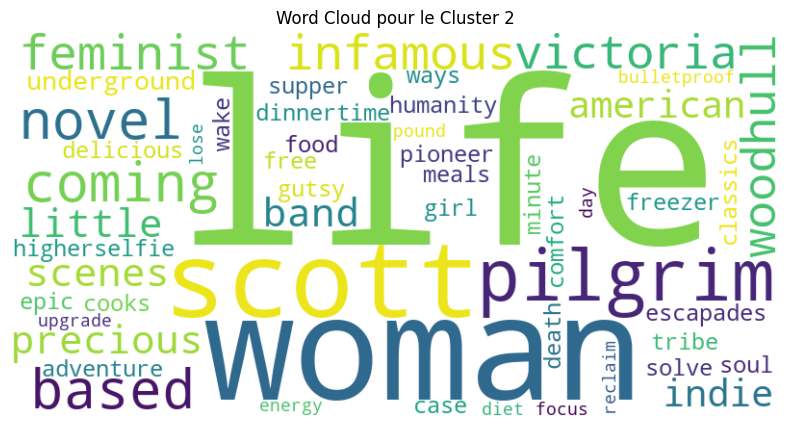

In [34]:
for cluster in sorted(data['cluster'].unique()):
    plot_wordcloud(data, cluster)